Question 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generateData(d, N, noise=0.1):
    np.random.seed(12345)
    X = np.concatenate([np.ones([N, 1]), np.random.randn(N, d)], axis=1)
    lambdaTrue = -1 + 2 * np.tan(np.random.randn(len(X[0])))
    Y = 1 * ((X @ lambdaTrue + noise * np.random.randn(N)) > 0)
    D = X, Y
    return D

In [3]:
def split(D, train_size):
    x, y = D
    x_trainning = []
    x_testing = []
    y_traning = []
    y_testing = []
    for i in range(0, train_size):
        x_trainning.append(x[i])
        y_traning.append(y[i])
    for i in range(train_size, len(y)):
        x_testing.append(x[i])
        y_testing.append(y[i])
    return x_trainning, x_testing, y_traning, y_testing

In [4]:
def model(x, par):
    z = x @ par
    return 1 / (np.exp(-z) + 1)
    # return np.power(1 / (1 + np.power(np.e, -z)), -1)

In [5]:
def dModel(x, par):
    # f = np.power((1 + np.power(np.e, (np.dot(x, par)))), -1)
    f = np.power(1 + np.power(np.e, -np.dot(x, par)), -1)
    gradient = np.dot(f * (1 - f), x)
    return gradient

In [6]:
def objective(par, data):
    ell = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        # f = np.power((np.dot(par,x)),np.e)
        f = model(x, par)
        if y != 1:
            f = 1 - f
        s = -(np.log(f))
        ell = ell + s
    return ell

In [7]:
def gradient(par, data):
    grad = np.zeros(len(par))
    X, Y = data
    for n in range(0, len(X)):
        f = model(X[n], par)
        x, y = X[n], Y[n]
        s = -(y - f) / (y * f + (1 - y) * (1 - f))
        grad = grad + s * (dModel(x, par))
    return grad

In [8]:
def train(par0, eta, T, data):
    par = par0
    obj = []
    for t in range(0, T):
        ell = objective(par, data)
        obj.append(ell)
        grad = gradient(par, data)
        par = par - grad * eta
    return par, obj

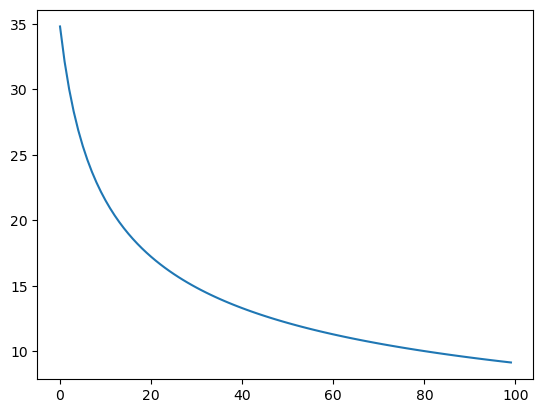

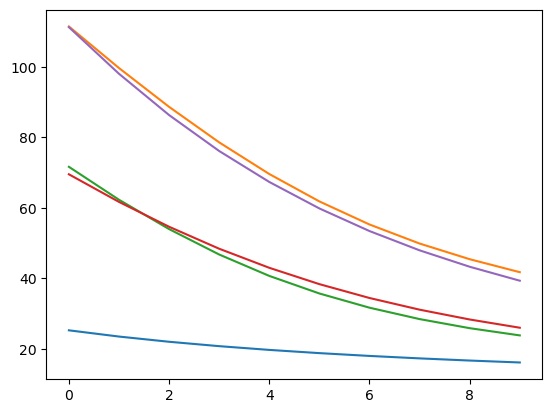

In [26]:
lambda1 = np.transpose(np.full(11, 0.01))
d = 10
N = 100
D = generateData(d, N)
x_trainning, x_testing, y_traning, y_testing = split(D, 50)
eta = 0.01
epoch = []
itterations = 10
tryInit = [np.random.randn(len(x_trainning[0])) for m in range(5)]
par, obj = train(lambda1, eta, 100, (x_trainning, y_traning))
plt.plot(obj)
plt.show()
for init in tryInit:
    par, values = train(init, eta, itterations, (x_trainning, y_traning))
    epoch.append((par, values))
for par, values in epoch:
    plt.plot(values)

In [10]:
def ER(par, data):
    ER = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        y_Hat = model(x, par) > 0.5
        s = 1 * (y != y_Hat)
        ER = ER + s
    return float(ER / len(data))

In [11]:
ERs = []
for i in range(0, len(epoch)):
    ERs.append(ER(tryInit[i], (x_testing, y_testing)))
print(ERs)

[5.0, 17.0, 13.0, 14.5, 16.5]


Question 2

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("CarsDataSetForCW1.csv", sep=",")
Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].to_numpy()
Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
X, Y = Z[:, 1:], Y

In [14]:
D_train = (X[:len(data) // 2], Y[:len(data) // 2])
D_test = (X[len(data) // 2:], Y[len(data) // 2:])

[4.5399929762484854e-05, 0.00012340980408667956, 0.00033546262790251185, 0.0009118819655545162, 0.0024787521766663585]
107.74524476604445


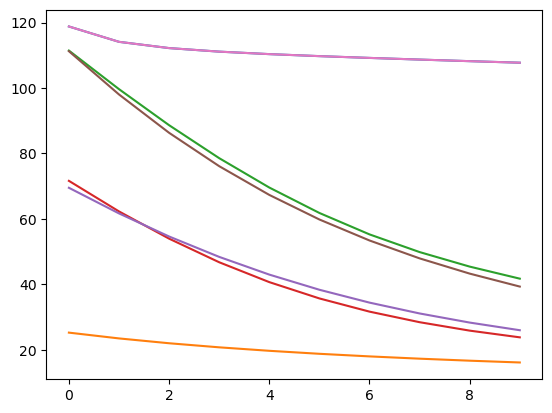

In [30]:
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
lambda1 = np.transpose(np.full(len(Z[0]), 0.01))
d = 5
N = 100
D = generateData(d, N)
etas = []
epochs = []
for m in range(d):
    etas.append(np.exp(m - 10))
print(etas)
x_testing = D_test_normalised[0]
y_testing = D_test_normalised[1]
x_trainning = D_train_normalised[0]
y_traning = D_train_normalised[1]
for i in range(0, d):
    par, vals = train(np.random.normal(0, 1, len(Z[0]) - 1), etas[i], N, (x_trainning, y_traning))
    epochs.append((par, vals))
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
lambda1 = np.transpose(np.full(len(Z[0]), 0.01))
d = 5
N = 100
D = generateData(d, N)
etas = []
epochs = []
for m in range(d):
    etas.append(np.exp(m - 10))
x_testing = D_test_normalised[0]
y_testing = D_test_normalised[1]
x_trainning = D_train_normalised[0]
y_traning = D_train_normalised[1]
for i in range(1,d):
    par, vals = train(np.random.normal(0, 1, len(x_trainning[0])), etas[i], itterations, (x_trainning, y_traning))
    epochs.append((par, vals))
plt.plot(vals)
for par, values in epoch:
    plt.plot(values)
# print(par)
print(np.min(vals))
plt.plot(vals)